In [282]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Strategy 1

In [283]:
# Download AAPL historical data
spy_data = yf.download("AAPL", start="2015-01-01", end="2023-08-31")

[*********************100%%**********************]  1 of 1 completed


# Pre-process and clean the data

In [284]:
spy_data.dtypes # checking types of columns

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [285]:
spy_data = spy_data.dropna()

In [286]:
# Create a new column 'Signal' with +1 for 'buy' and -1 for 'sell'
spy_data['Signal'] = np.where(spy_data['Close'].shift(-1) > spy_data['Close'], 1, -1)

In [287]:
# Define feature variables (X) and target variable (y)
X = spy_data.drop(columns=['Signal'])  # Use all columns except 'Signal'
y = spy_data['Signal']

In [288]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML models

In [289]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


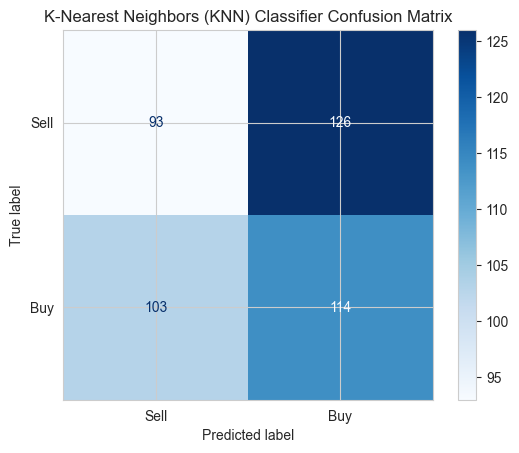

In [290]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Generate predictions using the KNN Classifier on the test data
y_pred = knn.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Sell', 'Buy'])
plt.title('K-Nearest Neighbors (KNN) Classifier Confusion Matrix')
plt.show()

In [291]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

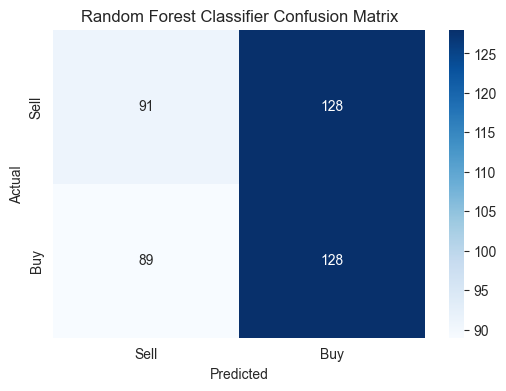

In [292]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the Random Forest Classifier on the test data
y_pred = rf.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [293]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

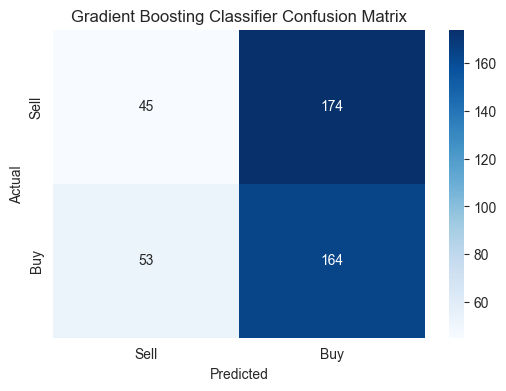

In [294]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the Gradient Boosting Classifier on the test data
y_pred = gb.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

In [295]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

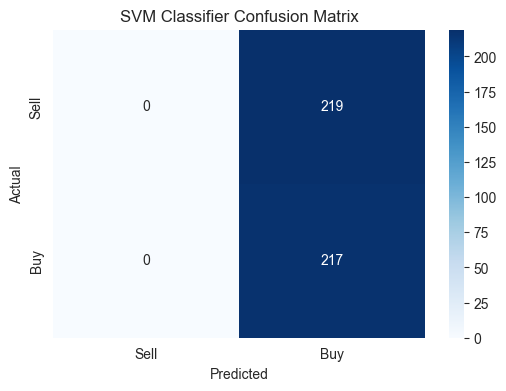

In [296]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the SVM Classifier on the test data
y_pred = svm.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Classifier Confusion Matrix')
plt.show()

In [297]:
# Create a new column 'Signal' with +1 for 'buy' and 0 for 'sell'

df = pd.DataFrame(spy_data)
df['Signal'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Define feature variables (X) and target variable (y)
X1 = df.drop(columns=['Signal'])  # Use all columns except 'Signal'
y1 = df['Signal']

# Split the data into training and test sets (80/20 split)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

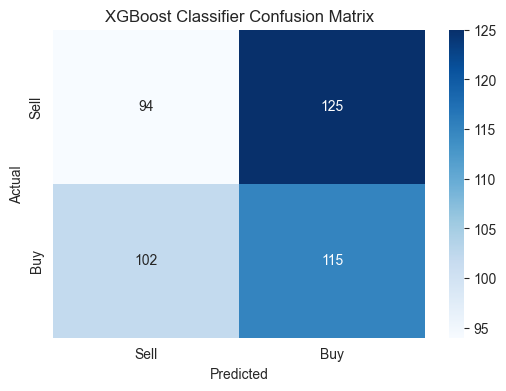

In [298]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the XGBoost Classifier on the test data
y_pred1 = xgb.predict(X_test1)

# Create a confusion matrix
confusion = confusion_matrix(y_test1, y_pred1)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

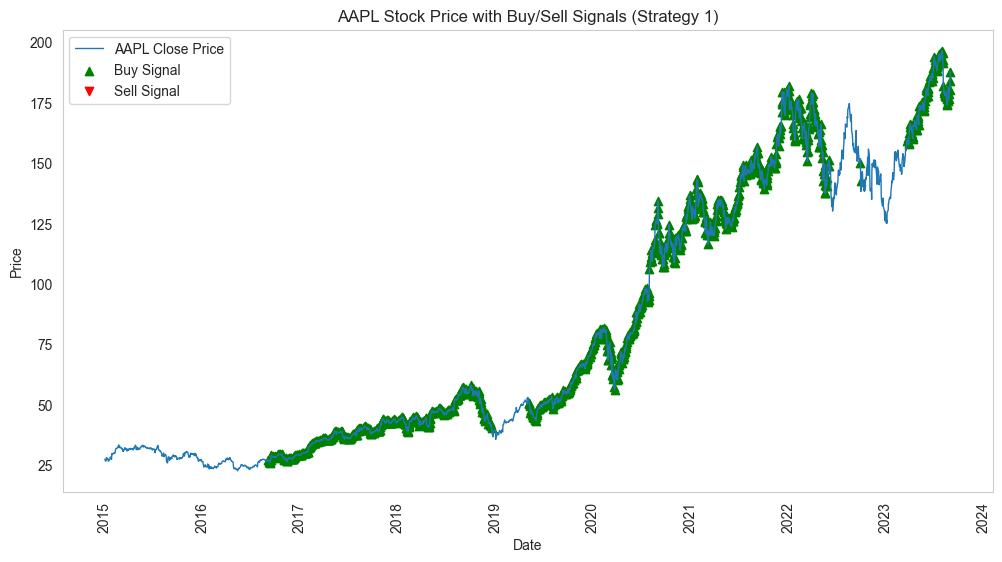

In [325]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the AAPL Close Price
ax.plot(spy_data.index, spy_data['Close'], label='AAPL Close Price', linewidth=1)

# Plot Buy and Sell Signals
buy_signal = spy_data[spy_data['Signal'] == 1]
sell_signal = spy_data[spy_data['Signal'] == -1]
ax.scatter(buy_signal.index, buy_signal['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
ax.scatter(sell_signal.index, sell_signal['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL Stock Price with Buy/Sell Signals (Strategy 1)')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.grid()
plt.show()

In [318]:
print(spy_data['Signal'].value_counts())

1    1467
0     713
Name: Signal, dtype: int64


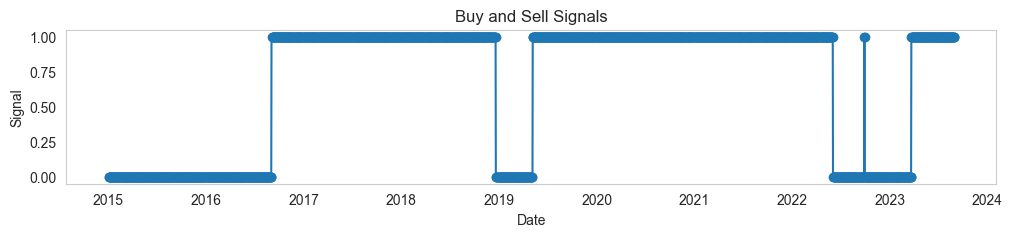

In [324]:
plt.figure(figsize=(12, 2))
plt.plot(spy_data.index, spy_data['Signal'], label='Signal', marker='o')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.title('Buy and Sell Signals')
plt.grid()
plt.show()

In [300]:
# Evaluate classifiers on the test dataset
knn_accuracy = knn.score(X_test, y_test)
rf_accuracy = rf.score(X_test, y_test)
gb_accuracy = gb.score(X_test, y_test)
svm_accuracy = svm.score(X_test, y_test)
xgb_accuracy = xgb.score(X_test, y_test)

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"XGB Accuracy: {xgb_accuracy:.2f}")

K-Nearest Neighbors Accuracy: 0.47
Random Forest Accuracy: 0.50
Gradient Boosting Accuracy: 0.48
SVM Accuracy: 0.50
XGB Accuracy: 0.26


# Strategy 2

In [301]:
# Calculate 50-day and 200-day moving averages
spy_data['50_MA'] = spy_data['Close'].rolling(window=50).mean()
spy_data['200_MA'] = spy_data['Close'].rolling(window=200).mean()

In [302]:
# Create a new column 'Signal' with +1 for 'buy' (golden cross) and -1 for 'sell' (death cross)
spy_data['Signal'] = np.where(spy_data['50_MA'] > spy_data['200_MA'], 1, -1)

In [303]:
# Define feature variables (X) and target variable (y)
X2 = spy_data.drop(columns=['Signal', '50_MA', '200_MA'])  # Use all columns except 'Signal', '50_MA', '200_MA'
y2 = spy_data['Signal']

In [304]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [305]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

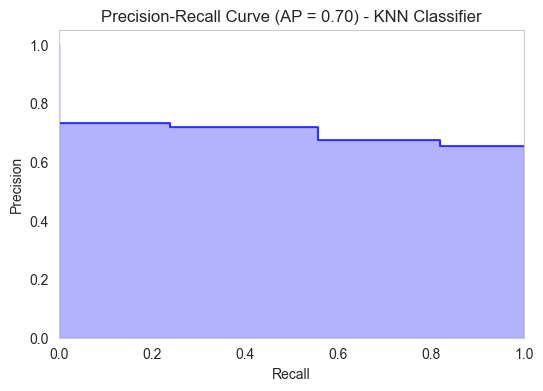

In [306]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Generate predicted probabilities for the positive class (class 1)
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f}) - KNN Classifier'.format(average_precision))
plt.grid()
plt.show()

In [307]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

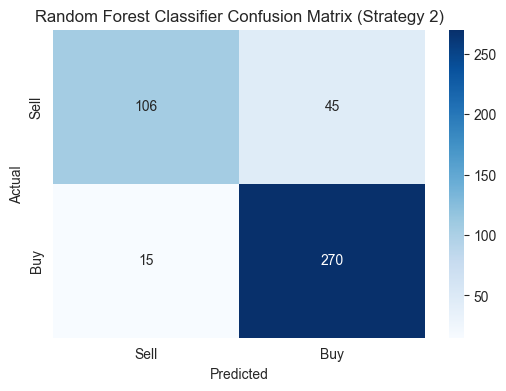

In [308]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix (Strategy 2)')
plt.show()

In [309]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

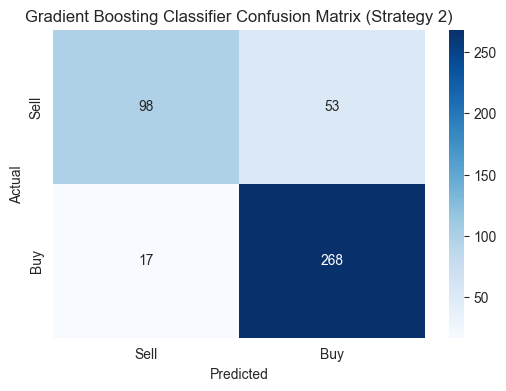

In [310]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = gb.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier Confusion Matrix (Strategy 2)')
plt.show()

In [311]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

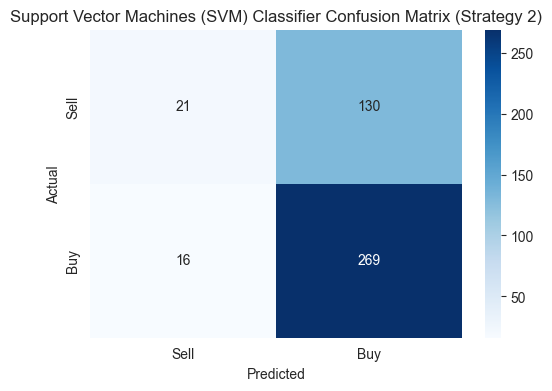

In [312]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machines (SVM) Classifier Confusion Matrix (Strategy 2)')
plt.show()

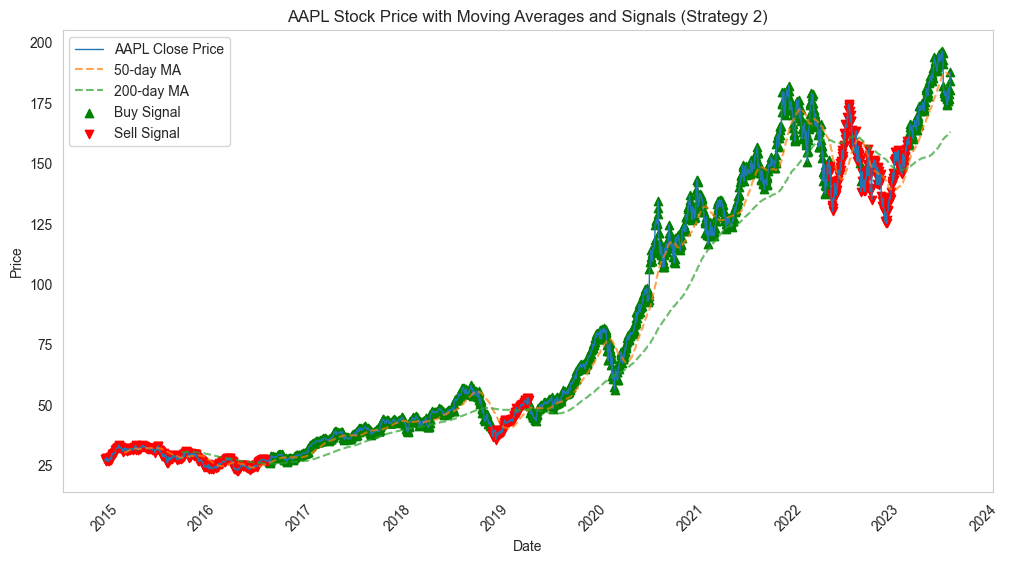

In [313]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Close Price
ax.plot(spy_data.index, spy_data['Close'], label='AAPL Close Price', linewidth=1)

# Plot the 50-day and 200-day Moving Averages
ax.plot(spy_data.index, spy_data['50_MA'], label='50-day MA', linestyle='--', alpha=0.7)
ax.plot(spy_data.index, spy_data['200_MA'], label='200-day MA', linestyle='--', alpha=0.7)

# Plot Buy (Golden Cross) and Sell (Death Cross) Signals
buy_signal = spy_data[spy_data['Signal'] == 1]
sell_signal = spy_data[spy_data['Signal'] == -1]
ax.scatter(buy_signal.index, buy_signal['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
ax.scatter(sell_signal.index, sell_signal['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL Stock Price with Moving Averages and Signals (Strategy 2)')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid()
plt.show()

In [314]:
# Evaluate classifiers on the test dataset
knn_accuracy = knn.score(X_test, y_test)
rf_accuracy = rf.score(X_test, y_test)
gb_accuracy = gb.score(X_test, y_test)
svm_accuracy = svm.score(X_test, y_test)

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

K-Nearest Neighbors Accuracy: 0.62
Random Forest Accuracy: 0.86
Gradient Boosting Accuracy: 0.84
SVM Accuracy: 0.67


In [316]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Create a binary target variable for Strategy 2
spy_data['Signal'] = np.where(spy_data['50_MA'] > spy_data['200_MA'], 1, 0)

# Define feature variables (X) and the binary target variable (y)
X5 = spy_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y5 = spy_data['Signal']

# Split the data into training and test sets (80/20 split)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X5_train, y5_train)

# Evaluate the classifier on the test dataset
accuracy = xgb_classifier.score(X5_test, y5_test)
print(f"XGBoost Classifier Accuracy for Strategy 2: {accuracy:.2f}")

XGBoost Classifier Accuracy for Strategy 2: 0.82
